## LogReg

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,f1_score,confusion_matrix,recall_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, \
                            ConfusionMatrixDisplay, RocCurveDisplay
import re

## Loading & Manipulating Data

In [3]:
## Loading in data
data = pd.read_csv("data/final_restaurant_rating_data.csv")
data.head()

,overall_rating,average_rating,average_rating_category,is_travellors_choice,is_michellin,is_in_mall,walking_distance,region_bedok,region_bishan_toa_payoh,region_bugis_city_hall,...,operates_on_sat_or_sun,average_sentiment_score,img_uploaded_per_review,proportion_of_positive_sentiment,nearest_train_line_color_blue,nearest_train_line_color_green,nearest_train_line_color_others,nearest_train_line_color_purple,nearest_train_line_color_red,nearest_train_line_color_yellow
0,4.0,3.8,0,0,0,0.0,744.5,0.0,0.0,0.0,...,1,0.276577,0.071429,0.857143,1.0,0.0,0.0,0.0,0.0,0.0
1,5.0,4.8,1,1,0,0.0,373.3,0.0,0.0,1.0,...,1,0.405635,0.292683,0.982927,0.0,0.0,0.0,0.0,0.0,1.0
2,4.5,4.7,1,1,0,0.0,227.9,0.0,0.0,0.0,...,1,0.424801,0.517665,0.971582,0.0,1.0,0.0,0.0,0.0,0.0
3,5.0,4.9,1,0,0,1.0,318.7,0.0,0.0,0.0,...,1,0.499230,0.909465,0.987654,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,4.8,1,1,0,0.0,1399.9,0.0,0.0,0.0,...,1,0.487331,0.605475,0.977456,0.0,0.0,0.0,1.0,0.0,0.0


In [4]:
## Datapoint with no sentiment score
data = data.drop([4765],axis=0) ##7191

In [5]:
data.shape

(7191, 111)

In [6]:
## Finding columns with nulls
for col in data.columns:
    if (data[col].isnull().values.any()):
        print(col)

average_rating


In [7]:
X = data.drop(columns=["overall_rating","average_rating","average_rating_category"])
y = data["average_rating_category"]

In [8]:
X['average_sentiment_score'] = (X['average_sentiment_score'] + 1)/2

In [9]:
X, X_holdout, y, y_holdout = train_test_split(X, y, test_size=0.15, random_state=2022, stratify=y)

In [10]:
X.head()

,is_travellors_choice,is_michellin,is_in_mall,walking_distance,region_bedok,region_bishan_toa_payoh,region_bugis_city_hall,region_bukit_merah_southern_islands,region_bukit_timah,region_changi,...,operates_on_sat_or_sun,average_sentiment_score,img_uploaded_per_review,proportion_of_positive_sentiment,nearest_train_line_color_blue,nearest_train_line_color_green,nearest_train_line_color_others,nearest_train_line_color_purple,nearest_train_line_color_red,nearest_train_line_color_yellow
827,0,0,1.0,858.4,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.671413,0.359375,0.906250,0.0,0.0,1.0,0.0,0.0,0.0
1426,0,0,0.0,278.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.671044,0.222222,0.888889,1.0,0.0,0.0,0.0,0.0,0.0
2134,0,0,0.0,360.3,0.0,0.0,1.0,0.0,0.0,0.0,...,1,0.621857,0.239130,0.782609,0.0,0.0,0.0,0.0,0.0,1.0
4922,0,0,0.0,684.7,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0.611436,1.000000,0.750000,0.0,0.0,0.0,0.0,0.0,1.0
4676,0,0,0.0,3096.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.597541,0.888889,0.833333,0.0,0.0,0.0,0.0,1.0,0.0


## Helper Functions

In [11]:
def evaluate_results(y_test, y_pred, y_proba, plot_confusion_matrix=True, plot_roc=False, title="Classification Results"):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix:")
    if plot_confusion_matrix:
        disp = ConfusionMatrixDisplay(cm, display_labels=["Poor [0]", "Excellent [1]"])
        disp.plot(cmap=plt.cm.OrRd)
        plt.title(title,pad=5)
        plt.show()
    else:
        print(cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_pred)))
    print("Recall: {:.5f}".format(recall_score(y_test, y_pred)))
    print("Precision: {:.5f}".format(precision_score(y_test, y_pred)))
    print("F1: {:.5f}".format(f1_score(y_test, y_pred)))
    print("ROC_AUC: {:.5f}".format(roc_auc_score(y_test, y_proba)))      # pass in probability
    
    if plot_roc:
        disp = RocCurveDisplay.from_predictions(y_test,y_proba)
        plt.show()
def stratified_k_fold_model_fit(X, Y, model, splits=5, shuffle=False, verbose=True, plot_confusion_matrix=True, plot_roc=True, hide_fold_result=False, title=None):
    X = np.array(X)
    Y = np.array(Y)

    if shuffle:
        kf = StratifiedKFold(n_splits=splits, shuffle=shuffle, random_state=2022)
        kf.get_n_splits(X, Y)
    else:
        kf = StratifiedKFold(n_splits=splits, shuffle=shuffle)
        kf.get_n_splits(X, Y)
    
    # ----- Test ----- #
    auc_scores = [] # AUC scores
    all_y_preds = [] # predictions
    all_y_proba = [] # probabilities
    all_y_true = [] # true labels

    # ----- Train ----- #
    train_auc_scores = [] # AUC scores
    train_y_preds = [] # predictions
    train_y_proba = [] # probabilities
    train_true = [] # true labels

    for train, test in kf.split(X, Y):
        # get the current train and test sets (for this particular fold)
        X_train, Y_train = X[train], Y[train]
        X_test, Y_test = X[test], Y[test]
        
        model_fit = model.fit(X_train, Y_train.ravel())

        # predict on training set
        y_pred_train = model_fit.predict(X_train)
        y_proba_train = model_fit.predict_proba(X_train)
        train_y_preds.extend(y_pred_train)
        train_y_proba.extend(y_proba_train[:, 1])
        train_true.extend(Y_train)
        
        # predict on validation set
        # y_pred = model_fit.predict(X_test)
        y_proba = model_fit.predict_proba(X_test)
        y_pred = [1 if y_prob >= 0.5 else 0 for y_prob in y_proba[:, 1]]

        if verbose and not hide_fold_result:
            print('-'*20 + ' Fold Result' + '-'*20)
            evaluate_results(Y_test, y_pred, y_proba[:, 1], plot_confusion_matrix=False, plot_roc=False, title=title)

        all_y_preds.extend(y_pred)
        all_y_proba.extend(y_proba[:, 1])
        all_y_true.extend(Y_test)
    
    # Evaluate results
    if verbose:
        print('-'*20 + ' Overall Train Result' + '-'*20)
        evaluate_results(train_true, train_y_preds, train_y_proba, plot_confusion_matrix=plot_confusion_matrix, plot_roc=plot_roc, title=title)
        print('-'*20 + ' Overall Test Result' + '-'*20)
        evaluate_results(all_y_true, all_y_preds, all_y_proba, plot_confusion_matrix=plot_confusion_matrix, plot_roc=plot_roc, title=title)
        
    return roc_auc_score(train_true, train_y_proba), roc_auc_score(all_y_true, all_y_proba)

## Model 0

-------------------- Overall Train Result--------------------
Confusion Matrix:


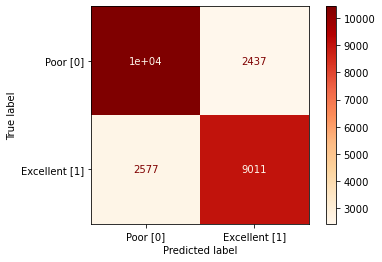

TN: 10423, FP: 2437, FN: 2577, TP: 9011
Accuracy: 0.79491
Recall: 0.77761
Precision: 0.78712
F1: 0.78234
ROC_AUC: 0.86803


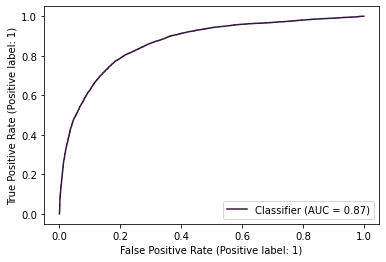

-------------------- Overall Test Result--------------------
Confusion Matrix:


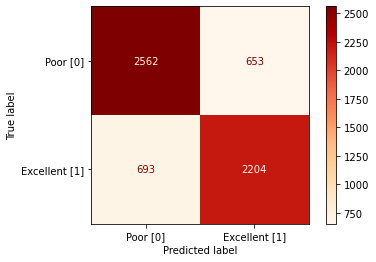

TN: 2562, FP: 653, FN: 693, TP: 2204
Accuracy: 0.77978
Recall: 0.76079
Precision: 0.77144
F1: 0.76608
ROC_AUC: 0.85581


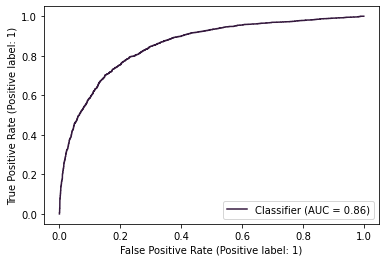

In [12]:
lr_model = LogisticRegression(penalty="l1" ,solver='liblinear',max_iter=2000)

roc_auc_train_model0, roc_auc_test_mode0 = stratified_k_fold_model_fit(X,y, lr_model, 5, shuffle=True, hide_fold_result=True)

## Model 1

In [13]:
## P-val > 0.05, can use for model
from sklearn.feature_selection import chi2
scores, pvalues = chi2(X, y)
pvalues

array([2.48714111e-49, 2.00037733e-10, 6.33241489e-28, 0.00000000e+00,
       2.82419950e-01, 3.86699383e-01, 8.57228232e-01, 8.87877128e-01,
       6.54739440e-01, 1.62057852e-01, 5.60451463e-03, 1.29671806e-01,
       8.71915925e-02, 2.27920920e-01, 1.61755789e-02, 2.39617017e-01,
       3.31819032e-04, 2.22642805e-06, 4.61166469e-01, 1.82412735e-16,
       3.10707138e-05, 3.67019454e-02, 6.02168797e-04, 5.09700604e-01,
       7.27298529e-01, 1.64841679e-05, 5.36581476e-01, 5.94161194e-02,
       1.25022343e-01, 1.24705434e-02, 5.96894307e-02, 1.08756691e-14,
       1.98491922e-01, 7.23922745e-01, 1.62867561e-03, 1.51951757e-02,
       5.79043220e-01, 8.37239273e-01, 4.04681329e-03, 2.38613329e-04,
       6.28321276e-04, 1.52386007e-12, 6.33017462e-01, 8.50145366e-01,
       1.36376572e-04, 1.87004723e-01, 5.90233272e-01, 1.32119116e-02,
       9.09708960e-01, 2.09639619e-01, 3.66475567e-01, 4.60737585e-01,
       4.87122048e-02, 2.79515293e-02, 5.51178330e-01, 6.02839256e-01,
      

In [14]:
pvals_df = pd.DataFrame(pvalues,index=X.columns).rename(columns={0:'Pval'})
pvals_df = pvals_df[pvals_df.Pval > 0.05] ## Variables that are dependent.

In [15]:
X_m1_train = X[pvals_df.index]

-------------------- Overall Train Result--------------------
Confusion Matrix:


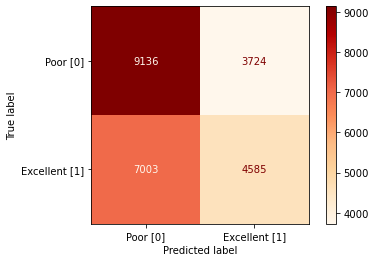

TN: 9136, FP: 3724, FN: 7003, TP: 4585
Accuracy: 0.56123
Recall: 0.39567
Precision: 0.55181
F1: 0.46087
ROC_AUC: 0.58398


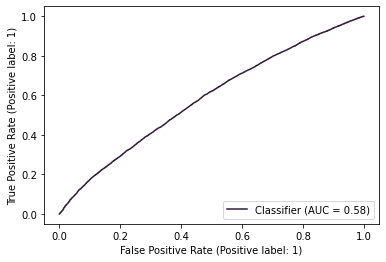

-------------------- Overall Test Result--------------------
Confusion Matrix:


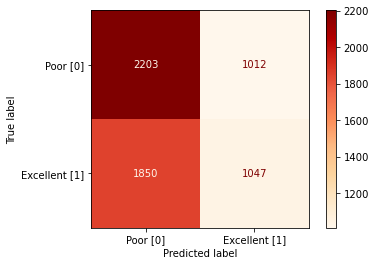

TN: 2203, FP: 1012, FN: 1850, TP: 1047
Accuracy: 0.53174
Recall: 0.36141
Precision: 0.50850
F1: 0.42252
ROC_AUC: 0.54329


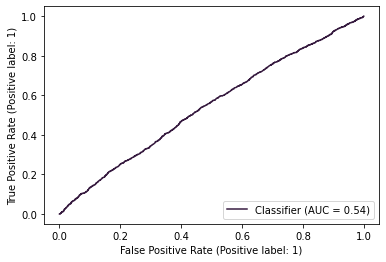

In [16]:
lr_model = LogisticRegression(penalty="l1" ,solver='liblinear',max_iter=2000)

roc_auc_train_model1, roc_auc_test_model1 = stratified_k_fold_model_fit(X_m1_train,y, lr_model, 5, shuffle=True, hide_fold_result=True)

## Model 2

In [17]:
param = {'C': [0.01,0.1,1,10,100,1000], 'penalty': ['l1']}

lr_model = LogisticRegression( solver='liblinear',max_iter=2000)
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X,y)

# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_,max_iter=2000,solver='liblinear')
model.fit(X,y)

LogisticRegression(C=1, max_iter=2000, penalty='l1', solver='liblinear')

In [18]:
coef = model.coef_[0]
imp_features = pd.Series(X.columns)[list(coef!=0)]
X_m2_train = X[imp_features]

-------------------- Overall Train Result--------------------
Confusion Matrix:


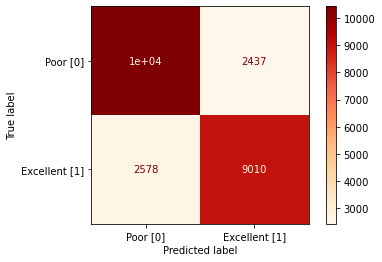

TN: 10423, FP: 2437, FN: 2578, TP: 9010
Accuracy: 0.79487
Recall: 0.77753
Precision: 0.78711
F1: 0.78229
ROC_AUC: 0.86790


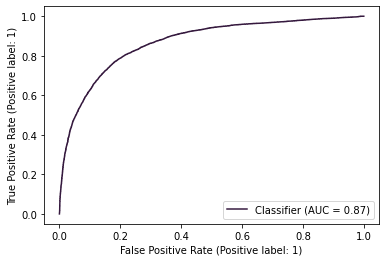

-------------------- Overall Test Result--------------------
Confusion Matrix:


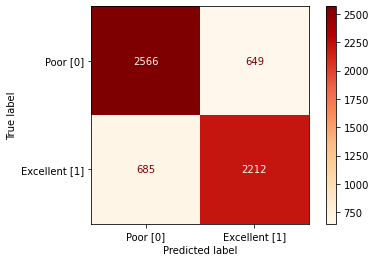

TN: 2566, FP: 649, FN: 685, TP: 2212
Accuracy: 0.78174
Recall: 0.76355
Precision: 0.77316
F1: 0.76832
ROC_AUC: 0.85694


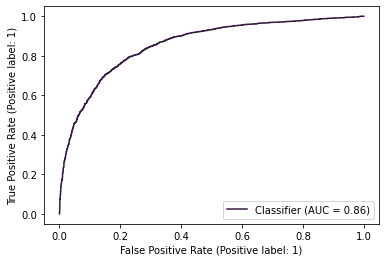

In [19]:
lr_model =  LogisticRegression(**gs_model.best_params_,max_iter=2000,solver='liblinear')

roc_auc_train_model2, roc_auc_test_model2 = stratified_k_fold_model_fit(X_m2_train,y, lr_model, 5, shuffle=True, hide_fold_result=True)

## Feature Importance

In [20]:
import seaborn as sns

sns.set_palette("rocket")
pal = sns.color_palette("rocket")
hex_colors = pal.as_hex()

In [21]:
target_rating_variable = [
    # 'overall_rating',
    # 'average_rating',
    'average_rating_category',
]

region_ohe = [
    'region_bedok',
    'region_bishan_toa_payoh',
    'region_bugis_city_hall',
    'region_bukit_merah_southern_islands',
    'region_bukit_timah',
    'region_changi',
    'region_downtown',
    'region_geylang',
    'region_kallang',
    'region_marina_bay',
    'region_marina_centre',
    'region_newton_orchard',
    'region_north_region',
    'region_northeast_region',
    'region_novena',
    'region_outram',
    'region_paya_lebar_tampines_pasir_ris',
    'region_queenstown',
    'region_rochor',
    'region_singapore_river',
    'region_tanglin',
    'region_west_region',
]

nearby_attraction_ohe = [
    'nearby_attraction_arab_street',
    'nearby_attraction_boat_quay',
    'nearby_attraction_chinatown',
    'nearby_attraction_east_coast_park',
    'nearby_attraction_garden',
    'nearby_attraction_little_india',
    'nearby_attraction_marina_bay',
    'nearby_attraction_merlion_park',
    'nearby_attraction_museum',
    'nearby_attraction_observation',
    'nearby_attraction_orchard_road',
    'nearby_attraction_wildlife',
    'nearby_attraction_nan',
]

nearby_attraction_feature_cross = [
    'nearby_attraction_arab_street_above_median',
    'nearby_attraction_boat_quay_above_median',
    'nearby_attraction_chinatown_above_median',
    'nearby_attraction_east_coast_park_above_median',
    'nearby_attraction_garden_above_median',
    'nearby_attraction_little_india_above_median',
    'nearby_attraction_marina_bay_above_median',
    'nearby_attraction_merlion_park_above_median',
    'nearby_attraction_museum_above_median',
    'nearby_attraction_observation_above_median',
    'nearby_attraction_orchard_road_above_median',
    'nearby_attraction_wildlife_above_median',
]

meal_ohe = [
    'meal_lunch',
    'meal_dinner',
    'meal_drinks',
    'meal_breakfast',
    'meal_brunch',
    'meal_after_hours',
    'has_meals',
]

cuisine_ohe = [
    'cuisine_arabic',
    'cuisine_asian',
    'cuisine_chinese',
    'cuisine_european',
    'cuisine_indian',
    'cuisine_international',
    'cuisine_italian',
    'cuisine_japanese',
    'cuisine_south_american',
    'cuisine_north_american',
    'cuisine_others',
    'cuisine_sea',
    'has_cuisines',
]

feature_ohe = [
    'feature_delivery',
    'feature_reservations',
    'feature_outdoor_seating',
    'feature_seating',
    'feature_highchairs_available',
    'feature_digital_payments',
    'feature_free_wifi',
    'feature_cash_only',
    'feature_wheelchair_accessible',
    'feature_table_service',
    'feature_live_music',
    'feature_parking_avail',
    'feature_alcohol_avail',
    'feature_creditcard_avail',
    'has_features',    
]

diet_ohe = [
    'diet_vegetarian_friendly',
    'diet_vegan_options',
    'diet_gluten_free_options',
    'diet_halal',    
]

train_station_ohe = [
    'nearest_train_line_color_blue',
    'nearest_train_line_color_green',
    'nearest_train_line_color_others',
    'nearest_train_line_color_purple',
    'nearest_train_line_color_red',
    'nearest_train_line_color_yellow',    
]

price_features=  [
    'has_price_category',
    'price_category',
]

other_features = [
    'average_sentiment_score',
    'img_uploaded_per_review',
    'proportion_of_positive_sentiment',
    'is_travellors_choice',
    'is_michellin',
    'is_in_mall',
    'walking_distance',
    'above_median_dist_from_nearby_attraction'
]

operating_hours_featueres = [
    'total_operating_hours',
    'num_of_days_open',
    'average_daily_operating_hours',
    'operates_on_weekends',
    'operates_on_sat_or_sun',
    'has_operating_hours'
]

dct_feature_category = {}

for col in region_ohe:
    dct_feature_category[col] = "Region OHE"

for col in nearby_attraction_ohe:
    dct_feature_category[col] = "Nearby Attraction OHE"

for col in nearby_attraction_feature_cross:
    dct_feature_category[col] = "Nearby Attraction Feature Cross"

for col in meal_ohe:
    dct_feature_category[col] = "Meal OHE"

for col in cuisine_ohe:
    dct_feature_category[col] = "Cuisine OHE"

for col in feature_ohe:
    dct_feature_category[col] = "Feature OHE"

for col in diet_ohe:
    dct_feature_category[col] = "Diet OHE"

for col in train_station_ohe:
    dct_feature_category[col] = "Nearest Train Station Color OHE"    

for col in train_station_ohe:
    dct_feature_category[col] = "Nearest Train Station Color OHE"    

for col in price_features:
    dct_feature_category[col] = "Price Features"

for col in operating_hours_featueres:
    dct_feature_category[col] = "Operating Hours Features"

for col in other_features:
    dct_feature_category[col] = re.sub("_", " ", col).title()


In [22]:
df_coef = pd.DataFrame(list(zip(X_m2_train.columns, lr_model.coef_[0])), columns=['features', 'coef'])
df_coef["feature_category"] = df_coef["features"].map(dct_feature_category)
df_coef

,features,coef,feature_category
0,is_travellors_choice,1.118745,Is Travellors Choice
1,is_michellin,0.320577,Is Michellin
2,is_in_mall,-0.485381,Is In Mall
3,walking_distance,-0.000005,Walking Distance
4,region_bedok,0.000000,Region OHE
...,...,...,...
82,img_uploaded_per_review,0.456831,Img Uploaded Per Review
83,proportion_of_positive_sentiment,3.218129,Proportion Of Positive Sentiment
84,nearest_train_line_color_green,-0.083995,Nearest Train Station Color OHE
85,nearest_train_line_color_purple,-0.073250,Nearest Train Station Color OHE


In [29]:
df_coef.sort_values('coef', ascending=False).iloc[:20,:]

,features,coef,feature_category
81,average_sentiment_score,22.214153,Average Sentiment Score
83,proportion_of_positive_sentiment,3.218129,Proportion Of Positive Sentiment
80,operates_on_sat_or_sun,1.222209,Operating Hours Features
0,is_travellors_choice,1.118745,Is Travellors Choice
56,cuisine_others,0.714890,Cuisine OHE
74,diet_gluten_free_options,0.618864,Diet OHE
82,img_uploaded_per_review,0.456831,Img Uploaded Per Review
69,feature_parking_avail,0.449871,Feature OHE
27,nearby_attraction_east_coast_park,0.417857,Nearby Attraction OHE
23,has_price_category,0.391449,Price Features


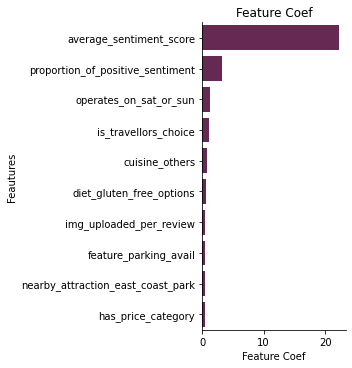

In [30]:
ax = sns.catplot(
    y = 'features',
    x = 'coef',
    data = df_coef.sort_values(by=['coef'], ascending=False).head(10),
    kind='bar',
    # hue='feature_category',
    color=hex_colors[1]
)

# ax.fig.gca().set(xlim=(3.5,4.1))
ax.fig.gca().set_title("Feature Coef")
ax.fig.gca().set_ylabel("Feautures")
ax.fig.gca().set_xlabel("Feature Coef")
plt.show()

In [32]:
df_coef.groupby(["feature_category"]).agg({"coef": ["min", "max", "mean"], "features": ["count"]}).sort_values(by=[("coef", "mean")], ascending=False)

coef                        \
                                                min        max       mean   
feature_category                                                            
Average Sentiment Score                   22.214153  22.214153  22.214153   
Proportion Of Positive Sentiment           3.218129   3.218129   3.218129   
Is Travellors Choice                       1.118745   1.118745   1.118745   
Img Uploaded Per Review                    0.456831   0.456831   0.456831   
Is Michellin                               0.320577   0.320577   0.320577   
Diet OHE                                  -0.108655   0.618864   0.211193   
Operating Hours Features                  -0.478002   1.222209   0.137277   
Price Features                            -0.226557   0.391449   0.082446   
Nearby Attraction Feature Cross           -0.378086   0.338045   0.015254   
Above Median Dist From Nearby Attraction   0.003095   0.003095   0.003095   
Walking Distance                          -0.000005  -0.000005  -0.000005   
Meal OHE                                  -0.218042   0.186696  -0.004015   
Cuisine OHE                               -0.618359   0.714890  -0.016461   
Region OHE                                -0.583451   0.297278  -0.058716   
Feature OHE                               -0.306337   0.449871  -0.064280   
Nearby Attraction OHE                     -0.412994   0.417857  -0.093725   
Nearest Train Station Color OHE           -0.151768  -0.073250  -0.103005   
Is In Mall                                -0.485381  -0.485381  -0.485381   

                                         features  
                                            count  
feature_category                                   
Average Sentiment Score                         1  
Proportion Of Positive Sentiment                1  
Is Travellors Choice                            1  
Img Uploaded Per Review                         1  
Is Michellin                                    1  
Diet OHE                                        4  
Operating Hours Features                        5  
Price Features                                  2  
Nearby Attraction Feature Cross                 6  
Above Median Dist From Nearby Attraction        1  
Walking Distance                                1  
Meal OHE                                        7  
Cuisine OHE                                    12  
Region OHE                                     19  
Feature OHE                                    13  
Nearby Attraction OHE                           8  
Nearest Train Station Color OHE                 3  
Is In Mall                                      1

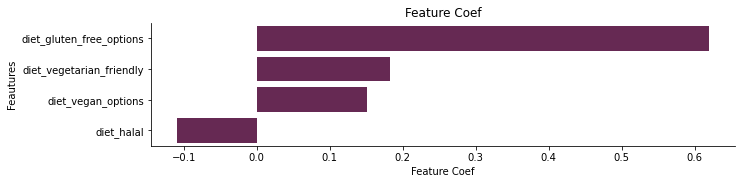

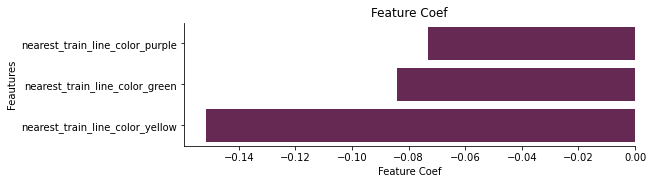

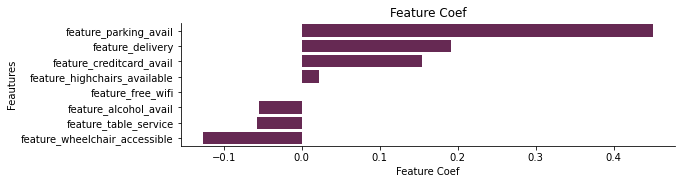

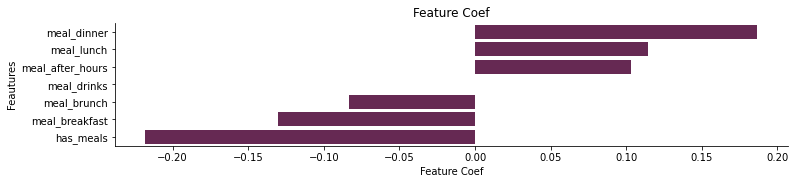

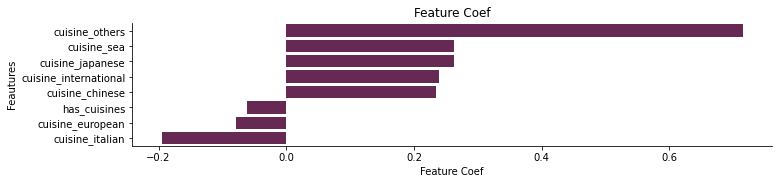

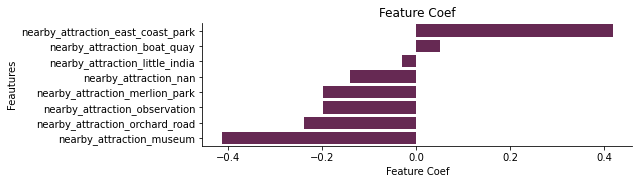

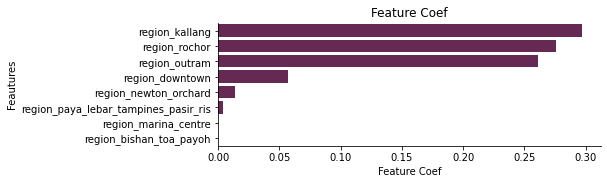

In [33]:
for i in ["Diet OHE", "Nearest Train Station Color OHE", "Feature OHE", "Meal OHE", "Cuisine OHE", "Nearby Attraction OHE", "Region OHE"]:
    ax = sns.catplot(
        y = 'features',
        x = 'coef',
        data = df_coef[df_coef["feature_category"]==i].sort_values(by=['coef'], ascending=False).head(8),
        kind='bar',
        # hue='feature_category',
        color=hex_colors[1]
    )

    # ax.fig.gca().set(xlim=(3.5,4.1))
    ax.fig.set_figheight(2)
    ax.fig.set_figwidth(15)
    ax.fig.gca().set_title("Feature Coef")
    ax.fig.gca().set_ylabel("Feautures")
    ax.fig.gca().set_xlabel("Feature Coef")
    plt.show()